Let's begin by defining all the dependencies, all the cosmethics and the given physical values

In [367]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
## - - - - - - - - - - - - - - - - - - - - - - - - - - -
##      plotting properties
## - - - - - - - - - - - - - - - - - - - - - - - - - - -

plt.rcParams.update({
	'text.usetex': True,
	'font.family':'serif',
	'mathtext.fontset' : 'cm',
	'mathtext.rm': 'serif',
	'font.weight': 'normal',
	'axes.labelweight': 'normal',
	'axes.linewidth': 1.5,
	'xtick.major.width': 1.5,
	'xtick.major.size': 10.0,
	'xtick.minor.size': 5.0,
	'ytick.major.width': 1.5,
	'ytick.major.size': 10.0,
	'ytick.minor.size': 5.0,
	'font.size': 30})
plt.rcParams.update({'font.size': 20})

m=40*1.66*1e-27
kb=1.38*1e-23
T=3
mu = 30*kb*T
A=3.5e+31
beta = 1/(kb*T)
n=1

Let's plot the function to see the result

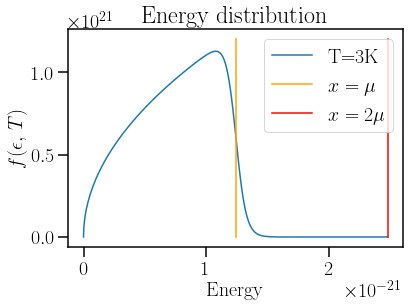

In [74]:
def f(epsilon, Temp):
    beta    = 1/(kb*Temp)
    numer   = A*np.sqrt(epsilon)
    denom   = np.exp(beta*(epsilon-mu)) + 1.0
    return numer/denom 

xfunc = np.linspace(0,2*mu,1000)
yfunc = f(xfunc,3)
plt.plot(xfunc,yfunc, label = "T=3K")
plt.plot([mu, mu],[0,1.2e21], color = "orange", label = "$x = \mu$")
plt.plot([2*mu, 2*mu],[0,1.2e21], color = "red", label = "$x=2\mu$")
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.title("Energy distribution")
plt.legend()

# Exercice 1

a) We have to show that the given function : 
$$
f(\epsilon) = A \dfrac{\sqrt{\epsilon}}{\exp(\beta(\epsilon-\mu))+1}
$$
is indeed a pdf

In [383]:
xMin=0
xMax=2*mu

#If you want to compute the integral of a function, just implement it
#Useful for the integral = 1 or the standard deviation.
def integral(n):
    nPts=n+1
    nInt=n
    x=np.linspace(xMin,xMax,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=A*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

def integralVar(n):
    nPts=n+1
    nInt=n
    x=np.linspace(xMin,xMax,nPts)
    y=np.zeros(len(x))
    for i in range(len(x)):
        denom = np.exp(beta*(x[i]-mu))+1
        y[i]=A*np.power((x[i]-meanTH),2)*np.sqrt(x[i])/denom
    integrale=0
    for i in range(n):
        integrale += (y[i]+y[i+1])*(x[i+1]-x[i])/2
    return integrale

varTH=integralVar(1000)

print("integral of f = ", integral(1000))
print("var= ", np.sqrt(integralVar(1000)))

integral of f =  1.0226866172662104
var=  3.344083971384022e-22


Text(0.5, 1.0, 'Numerical integral of $f$')

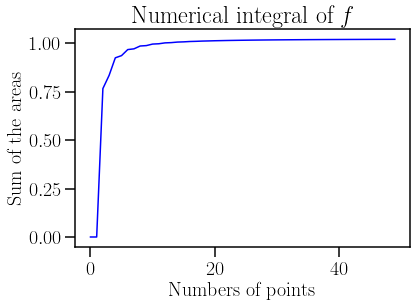

In [386]:
listint = np.zeros(50)
xplot = list(range(len(listint)))
for i in range(len(listint)):
    listint[i] = integral(i)

integral(5000)

plt.plot(xplot,listint, color = "blue")
plt.xlabel("Numbers of points")
plt.ylabel("Sum of the areas")
plt.title("Numerical integral of $f$")

b) Build a MC process to generate this probability density function for a large number of data
points, $N \gg 1$. Fill your results in a histogram, plot them and verify their correctness by
comparing them with the curve of the analytical form in Eq

In [99]:
def Egenerator(nEvents, Temp):
    listE =[]
    while len(listE)<nEvents :
        interval= (0, 2*mu)
        fmax    = np.max(f(np.linspace(*interval,1000),3))*1.05
        gen     = np.random.default_rng()
        x       = gen.uniform(*interval)
        y       = gen.uniform(0, fmax)
        if y < f(x, Temp):
            listE.append(x)
    return listE        

Text(0.5, 1.0, 'MC Generated Samples')

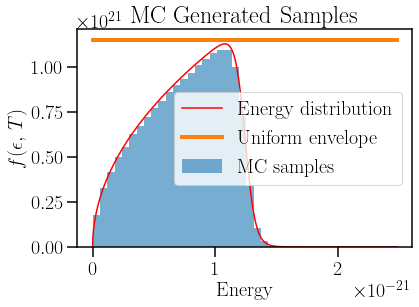

In [313]:
N       = 1000000
nBins   = 30 
fmax    = np.max(f(np.linspace(0,2*mu,1000),3))*1.02
data    = Egenerator(N, 3)

plt.plot(xfunc,yfunc, color = "r", label = "Energy distribution")
content,bin_edges, _ = plt.hist(data, density=True, bins =nBins, alpha = 0.6, label = "MC samples")
plt.plot([0,2*mu],[fmax,fmax], label="Uniform envelope", lw=4)
plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()
plt.title("MC Generated Samples")

c) Compute the sample mean $\langle\epsilon\rangle$ and compare with the expectation value:
$$
E = \dfrac{3}{5}n\mu
$$

The mean is :  7.448794589070482e-22  The theoretial mean is :  7.451999999999999e-22  The mean computed with numpy is :  7.5151547821088375e-22


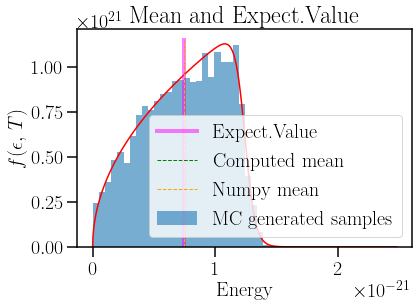

In [106]:
#Define the Width and the bin centers
#data = Egenerator(N, 3)
content,bin_edges, _ = plt.hist(data, density=True, bins =nBins, alpha = 0.6, label = "MC generated samples")
binWidth = (bin_edges[1] - bin_edges[0])
xCoords = bin_edges[:-1] + binWidth/2
#plt.scatter(list(xCoords), np.zeros(len(xCoords)), color = "red", label = "Bin center")

#compute the mean explicitely
mean = np.sum(content*xCoords) *binWidth
meanTH = (3/5)*n*mu

plt.plot(xfunc,yfunc, color = "red")
plt.plot([meanTH, meanTH], [0, fmax], color = "magenta",alpha = 0.5, lw = 4, label = "Expect.Value")
plt.plot([mean, mean], [0, fmax], '--', color = "green", lw = 1, label = "Computed mean")
plt.plot([m, m], [0, fmax], '--', color = "orange", lw = 1, label = "Numpy mean")

plt.xlabel("Energy")
plt.ylabel("$f(\epsilon,\,T)$")
plt.legend()
plt.title("Mean and Expect.Value")

m = np.mean(Egenerator(N,3))
print("The mean is : " ,mean, " The theoretial mean is : " , meanTH, " The mean computed with numpy is : ", m)



We see that the analysis is coherent and we could have used the function np.mean before ... --'

d) alculate E/kB T . Compare it with what you learnt from exercise sheet 5 and comment.

We have : 
$$
\mathbb{E} = \dfrac{3}{5}n\mu = \dfrac{3}{5}n \cdot 30\,k_BT = 18 k_BT
$$
, Which is coherent with the result

In [107]:
print(mean/(kb*T))
print(m/(kb*T))

17.992257461522907
18.15254778287159


e) Compute the variance, skewness and kurtosis of the distribution and comment.

In [317]:
v       = np.var(data)
s       = stats.skew(data)
k       = stats.kurtosis(data)
stdev   = np.sqrt(v)
stdev_APP = stdev

print("variance = ", v , " skewness = ", s , " kurtosis = ", k, "stand dev = ", stdev)

variance =  1.0946931529933901e-43  skewness =  -0.28322047392096794  kurtosis =  -0.915606454313799 stand dev =  3.3086147448643673e-22


# Exercice 2

a) Take Nexp = 1 and show the law of large numbers based on the data points you generated.

Now we take the data points we managed to get. They are all distributed according to $f$, with a mean of $18\cdot k_B T$ and a variance $var \approx 1.07 \cdot 10^{-43}$

If we want to show the laws of large numbers, we can show that if we progressively compute the mean for a given number of samples ($N_{exp}=1$), then the average will converge to a number, which should be the mean.

In [319]:
N=100000
data = Egenerator(N,3)
l = len(data)

listMean = np.zeros(int(N/10))
for i in range(int(l/10)):
    moy = np.mean(data[:i+1])
    listMean[i] = moy
xMean = np.linspace(0,N,int(l/10))

plt.plot([0,N],[18*kb*T,18*kb*T], color = "red", label = "$y = 18 kb T$")
plt.plot(xMean, listMean, label = "$<\epsilon> $ for N events ")

plt.xlabel("Number of sample in the mean")
plt.ylabel("Corresponding mean")
plt.legend()
plt.grid()
plt.semilogx()
plt.title("Convergence of mean")

KeyboardInterrupt: 

If we take the ratio, it converges asymptotically to 1

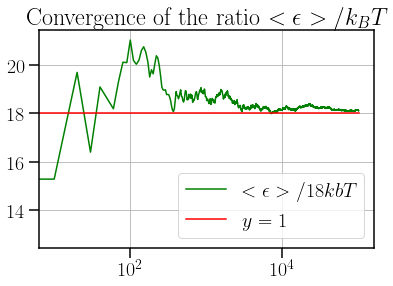

In [249]:
ratio = [listMean/(kb*T) for listMean in listMean]
plt.plot(xMean, ratio, color = "green", label = "$<\epsilon>/18 kb T$")
plt.plot([0,N],[18,18], color = "red", label = "$y = 1$")
plt.semilogx()
plt.grid()
plt.title("Convergence of the ratio $<\epsilon>/k_BT$")
plt.legend()


b) Take Nexp >> 1 and show the validity of the central limit theorem for the mean :

We will take for example 2000 experiment and every time, we will compute the mean and put it in a list

In the end, we put it in a histogram and see if it is a Gaussian.

In [ ]:
test = Egenerator(1000000,3)
stdev_APP = np.sqrt(np.var(test))

In [250]:
def gauss(x, gmean, gsigma):
    pref = 1/(np.sqrt(2*np.pi)*gsigma)
    return pref*np.exp(-(x-gmean)*(x-gmean)/(2*gsigma*gsigma))

In [390]:
#Code takes a bit of time to run
N=100
Nexp = 1000

k=1
listMean = []
listVar = []
while k<=Nexp :
    dat     = Egenerator(N,3)
    mean2   = np.mean(dat)
    var2    = np.var(dat)
    listMean.append(mean2)
    listVar.append(var2)
    k = k+1

Text(0.5, 0, '$<\\epsilon>$')

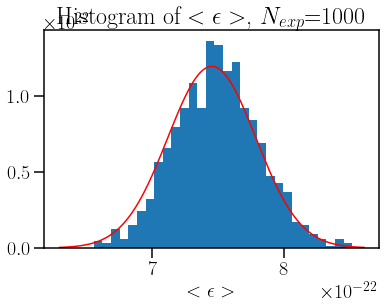

In [391]:
sigmaCLT = np.sqrt(varTH)/np.sqrt(N)
meanCLT = meanTH
xplot = np.linspace(meanTH-6*sigma, meanTH+6*sigma, 1000)
yplot = gauss(xplot, meanCLT, sigmaCLT)

plt.hist(listMean, density=True, bins = 30)
plt.plot(xplot,yplot, color ="red")
plt.title("Histogram of $<\epsilon>$, $N_{exp}$=1000" )
plt.xlabel("$<\epsilon>$")

c) Compute the variance of 〈e〉 and compare it with the value you expect.

In [336]:
np.var(listMean)/(sigmaCLT**2)

0.9836105945160495

This is almost 1, that means that they are roughly the same

# Exercice 3

a) What is the expected p.d.f. for the number of entries per bin?

the number of entries per bin is large => Gaussian with mean $f$. Let's compute the chi2 for one experiment ang generalise later.

3.8922385555607925e+39

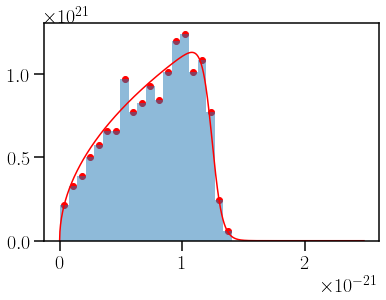

In [338]:
Nexp=1
N=1000
data = Egenerator(N,T)
nBins = 20

content,edges = np.histogram(data, bins = nBins, density=True)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2

    #Uncomment to see what happend
plt.hist(data, bins = nBins, density=True, alpha = 0.5)
plt.plot(xfunc,yfunc, color = "red")
plt.scatter(xExp, content, color = "red")


#The observed value is content[i] and the coordinate xExp[i]
#The expected value is f(epsilon, T) at xExp[i]
#Compute the difference

chi2 = 0
for j in range(len(content)):
    fj = N*f(xExp[j],T)*width
    dif = np.power((content[j]-fj)/fj,2)
    chi2 = chi2 + dif

chi2

Define a function for it

In [339]:
def doChiBin(binContent, binEdges):
    w = binEdges[1]-binEdges[0]
    xc = binEdges[:-1] + w/2
    X = 0
    for j in range(len(binContent)):
        fj = N*f(xc[j],T)*w
        d = np.power((binContent[j]-fj)/fj,2)
        X = X + d
    return X


In [346]:
Nexp=700
N=50
nBins = 30
chiList = []

for i in range(Nexp):
    dat = Egenerator(N,T)
    content,edges= np.histogram(dat, bins = nBins, density=False)
    chiList.append(doChiBin(content, edges))

(array([695.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([8.85378066e+42, 8.30486199e+45, 1.66008702e+46, 2.48968784e+46,
        3.31928866e+46, 4.14888948e+46, 4.97849030e+46, 5.80809112e+46,
        6.63769194e+46, 7.46729276e+46, 8.29689358e+46, 9.12649440e+46,
        9.95609522e+46, 1.07856960e+47, 1.16152969e+47, 1.24448977e+47,
        1.32744985e+47, 1.41040993e+47, 1.49337001e+47, 1.57633010e+47,
        1.65929018e+47, 1.74225026e+47, 1.82521034e+47, 1.90817043e+47,
        1.99113051e+47, 2.07409059e+47, 2.15705067e+47, 2.24001075e+47,
        2.32297084e+47, 2.40593092e+47, 2.48889100e+47]),
 <BarContainer object of 30 artists>)

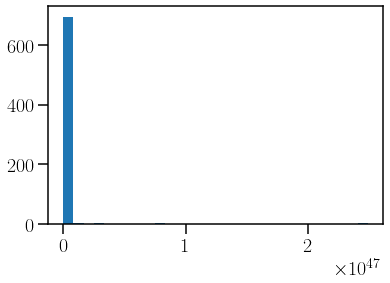

In [345]:
plt.hist(chiList, density=False, bins = 30)


c) How does the χ2 distribution change with the number of bins?

# Exercice 4

a) Compute the log likelihood ln L(x1, x2, ..., xN | μ) at a given μ. Then, use the maximum
likelihood method to estimate μ and its variance

In [18]:
def LLH(testData,Ttest):
    Loutput=0
    for i in range(0,len(testData)):
        Loutput+=math.log(f(testData[i],Ttest))
    return -Loutput

In [19]:
Nexp=1
N=3000
data = Egenerator(N,T)

print (LLH(data,3))

-144450.84869940585


Do this for various mu in the interval (0,10)

In [20]:
Ttest=np.linspace(0.5, 15, 1000)
listLikeliHood = np.zeros(len(Ttest))

for i in range(len(Ttest)):
    l = LLH(data,Ttest[i])
    listLikeliHood[i] = l

Lmin = min(listLikeliHood)
indexLmin = list(listLikeliHood).index(Lmin)


for i in range(len(Ttest)): #Normalize
    listLikeliHood[i] -= Lmin

print (Ttest[indexLmin],min(listLikeliHood))

3.141641641641642 0.0


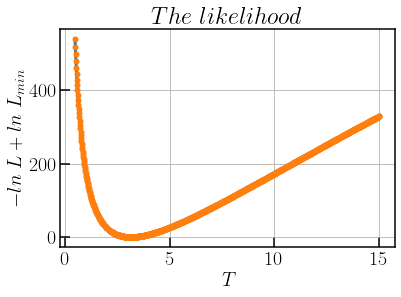

In [21]:
plt.plot(Ttest,listLikeliHood,'-',lw=3)
plt.plot(Ttest,listLikeliHood,'.',ms=10,lw=3)

plt.xlabel(r'$T$')
plt.ylabel(r'$-ln\ L+ln\ L_{min}$')
plt.title(r'$The\ likelihood$')

plt.tick_params(direction='in')
plt.grid(True)

Now, estimate the error

In [22]:
i1=0
i2=0
for i in range(0,len(Ttest)-1):
    if listLikeliHood[i]>0.5 and listLikeliHood[i+1]<0.5:
        i1=i
    if listLikeliHood[i]<0.5 and listLikeliHood[i+1]>0.5:
        i2=i

        
print ('The error of the estimation=',(Ttest[i2]-Ttest[i1])/2)

The error of the estimation= 0.20320320320320318


b) Compute the goodness of fit at various μ and use the least squares method to estimate μ
and its variance.

Let's now define a list of different $ \mu $  and for each one of them compute the least squares : 

$$
X = \sum \left(\dfrac{x-f(x)}{\sigma}\right)^2
$$

In [23]:
def calc_chi2(x, y, yerrs, param):
    chi2 = 0
    for i in range(len(x)):
        fct_value = f(x[i],param)
        chi2 += np.power((y[i] - fct_value) / yerrs[i], 2)
    return chi2

In [24]:
Nexp=1
N=5000
nBins = 30

content,edges = np.histogram(data, bins = nBins, density=True)
width = edges[1]-edges[0]
xExp = edges[:-1] + width/2

x=xExp
y=content
yerrs = np.sqrt(content)
params = np.linspace(0.5,10,600)

jmin = list(calc_chi2(x,y,yerrs,params)).index(min(calc_chi2(x,y,yerrs,params)))
calc_chi2(x,y,yerrs,params)[jmin]
print("index for min : " , jmin , " min value for T= ", params[jmin])


index for min :  150  min value for T=  2.878964941569282


c) The parameter μ can also be estimated by computing the sample mean 〈e〉 of Eq. (1) with
the MC integral. Perform this estimation of μ and its corresponding variance.

In [25]:
sample = np.linspace(0.5,10,100)
listMean = np.zeros(len(sample))

E = np.zeros(len(sample))
for k in range(len(sample)):
    gi = np.zeros(len(data))
    for j in range(len(data)):
        gi[j] = f(data[j], sample[k])
    E[k] = np.sum(gi)/N

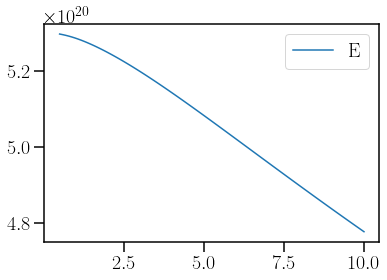

In [26]:
plt.plot(sample, E, label = "E")
plt.legend()